# Лабораторная работа 1
Функция:

$$ f(x, \theta) = \theta _0 + \theta _2 x^2 $$

$$ \theta _i = 1 $$

### План эксперимента
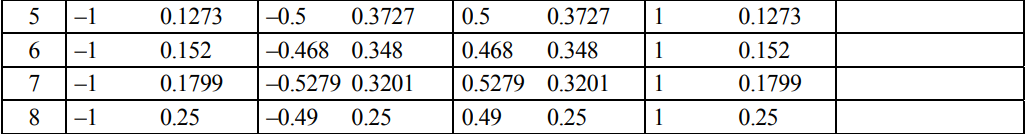

In [15]:
import pandas as pd
import numpy as np
import scipy.linalg as lng
import matplotlib as plt

In [16]:
%matplotlib inline

In [29]:
def func(x):
    return np.array([1, x**2]).reshape(2, 1)

n = 4
m = 2

data = [
    "-1 0.1273 -0.5 0.3727 0.5 0.3727 1 0.1273",
    "-1 0.152 -0.468 0.348 0.468 0.348 1 0.152",
    "-1 0.1799 -0.5279 0.3201 0.5279 0.3201 1 0.1799",
    "-1 0.25 -0.49 0.25 0.49 0.25 1 0.25",
]
data1 = [ 
    "-1 0.2 0 0.6 1 0.2", 
    "-1 0.25 0 0.5 1 0.25", 
    "-1 0.1884 0 0.6233 1 0.1884", 
    "-1 0.333 0 0.333 1 0.333", 
]
data_list = []
for row in data:
    val = row.split()
    row_arr = []
    for i in range(0, 8, 2):
        row_arr.append([ float(val[i]), float(val[i+1]) ])
    data_list.append(row_arr)
df = pd.DataFrame(data_list)
df

,0,1,2,3
0,"[-1.0, 0.1273]","[-0.5, 0.3727]","[0.5, 0.3727]","[1.0, 0.1273]"
1,"[-1.0, 0.152]","[-0.468, 0.348]","[0.468, 0.348]","[1.0, 0.152]"
2,"[-1.0, 0.1799]","[-0.5279, 0.3201]","[0.5279, 0.3201]","[1.0, 0.1799]"
3,"[-1.0, 0.25]","[-0.49, 0.25]","[0.49, 0.25]","[1.0, 0.25]"


In [30]:
df.at[1, 2][1] # я взяла p на 1-ой строке и 2-ом столбце, если считать с нуля

0.348

In [31]:
for j in range(n):
    # Информационная матрица
    M = np.zeros((m, m))
    for i in range(n):
        M += df.at[j, i][1] * (func(df.at[j, i][0]) * np.transpose(func(df.at[j, i][0])))
    # Дисперсионная матрица
    D = lng.inv(M)

    # Оценки
    # D-оптимальный план
    D_opt_plan = lng.det(M)
    # A-оптимальный план
    A_opt_plan = np.trace(D)
    # E-оптимальный план
    E_opt_plan = np.linalg.eigvals(M).min()
    # Фп-оптимальный план: введенные критерии Ф0, Ф1 и Ф2 -> p=2
    Fp_opt_plan = (np.matrix.trace(D @ D) / m)**0.5
    # Lambda-оптимальный план
    Lam_opt_plan = 0
    eig_aver = np.average(np.linalg.eigvals(D))
    for i in range(m):
        Lam_opt_plan += (np.linalg.eigvals(D)[i] - eig_aver)**2
    # MV-оптимальный план
    MV_opt_plan = np.diag(D).max()

    # G-оптимальный план
    d = list()
    for i in range(n):
        d.append(float(func(df.at[j, i][0]).T @ D @ func(df.at[j, i][0])))
    G_opt_plan = max(d)

    print("План номер ", j)
    print(M, "\n", D, "\n", D_opt_plan, "\n", A_opt_plan, "\n", E_opt_plan, "\n",
           Fp_opt_plan, "\n", Lam_opt_plan, "\n", MV_opt_plan, "\n", G_opt_plan, "\n")

План номер  0
[[1.        0.44095  ]
 [0.44095   0.3011875]] 
 [[ 2.82141278 -4.13065604]
 [-4.13065604  9.36762907]] 
 0.10675059750000004 
 12.189041845878187 
 0.08799119931340521 
 8.057216733702315 
 55.55111242742045 
 9.367629066432153 
 3.9277297721916726 

План номер  1
[[1.         0.4564407 ]
 [0.4564407  0.33738817]] 
 [[ 2.61439771 -3.53692758]
 [-3.53692758  7.74893113]] 
 0.12905005648488035 
 10.363328844490555 
 0.10468901133726707 
 6.778669577410492 
 38.20143010989611 
 7.74893112981443 
 3.289473684210526 

План номер  2
[[1.         0.53820992]
 [0.53820992 0.40951899]] 
 [[ 3.41695576 -4.49073063]
 [-4.49073063  8.34382734]] 
 0.11984907637748887 
 11.760783102405872 
 0.09088909367399578 
 7.79834484055354 
 52.47035491345828 
 8.343827338729737 
 2.779321845469705 

План номер  3
[[1.         0.62005   ]
 [0.62005    0.52882401]] 
 [[ 3.66318003 -4.29510529]
 [-4.29510529  6.92703054]] 
 0.14436200250000003 
 10.590210571511015 
 0.10111440182134535 
 7.0106525

C:\Users\Екатерина\AppData\Local\Temp\ipykernel_3824\1712546100.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d.append(float(func(df.at[j, i][0]).T @ D @ func(df.at[j, i][0])))
